# PySP开发测试区

## 0. 测试准备

### 0.1 测试环境导入

In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import numpy as np

### 0.2 测试数据生成

In [5]:
fs = 1000
t = np.arange(0, 5, 1/fs)

# 多个谐波分量
harmonics = (
    2 * np.sin(2 * np.pi * 50 * t) +      # 50Hz
    1.5 * np.sin(2 * np.pi * 120 * t) +   # 120Hz
    np.sin(2 * np.pi * 250 * t)           # 250Hz
)

# 冲击序列
impulse = np.zeros_like(t)
impulse_indices = [200, 500, 700]
impulse[impulse_indices] = [5, -4, 6]

# 随机噪声冲击
random_impulse = np.zeros_like(t)
random_indices = np.random.choice(len(t), 5, replace=False)
random_impulse[random_indices] = np.random.uniform(-3, 3, size=5)

# 白噪声
white_noise = np.random.normal(0, 0.5, size=len(t))

# 合成信号
Data = harmonics + impulse + random_impulse + white_noise


## 1. Signal模块测试

### 1.1 Signal.Signal()

Signal(data=[-0.31117198  2.76008559  2.30459207 ... -1.75929147 -2.88697011
 -2.90580667], fs=1000, label=测试信号)


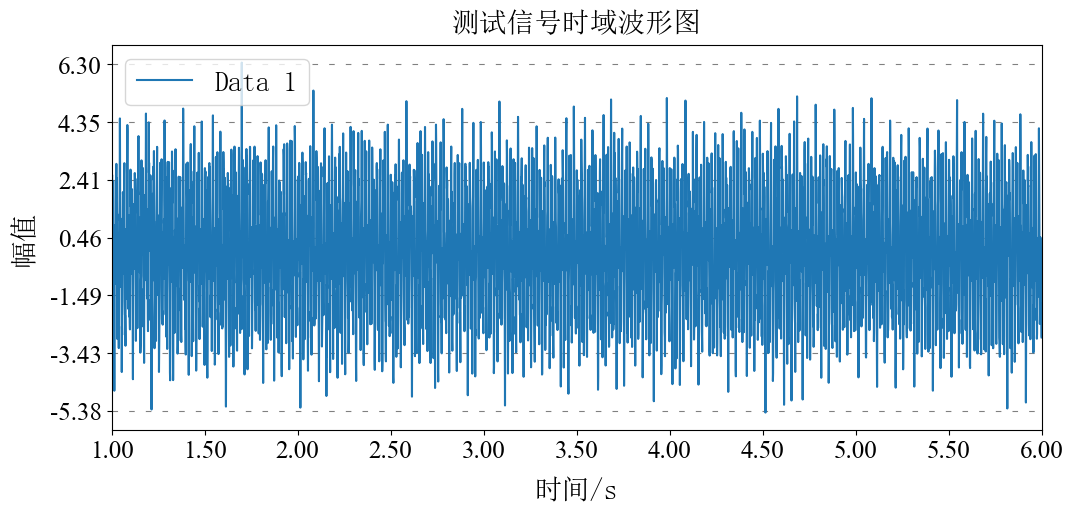

In [16]:
from PySP.Signal import Signal

try:
    Sig = Signal(Data,fs=fs, label="测试信号",t0=1)
    print(repr(Sig))
    Sig.plot()
except Exception as e:
    print(e)

### 1.2 Signal.Resample()

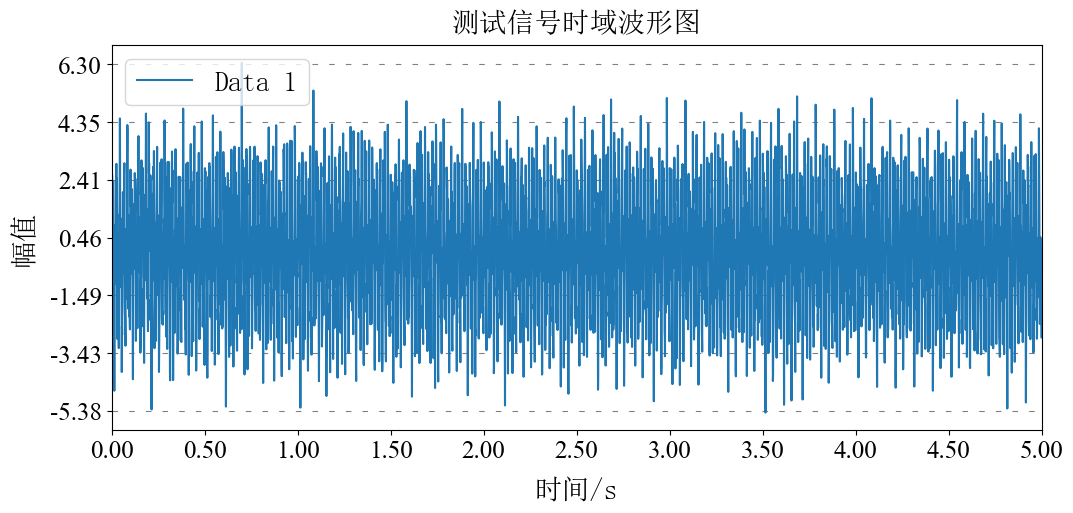

Signal(data=[ 0.0967745   2.62410039  2.04446277  0.11615095  1.0807847   1.57306486
 -0.37076454 -3.25492123 -2.21010805  0.04578867  1.06371362 -0.06457893
  0.88589427  2.15457929  2.27105536 -0.60290256 -2.36043354 -1.80351957
 -0.92465697 -0.96665239 -1.16431645  2.1125044   3.4122247   1.99213315
 -0.3078055  -0.43265699  0.60553332 -1.19543882 -3.60492863 -1.62386287
  1.54903095  1.88676859  0.35525526  1.18158767  2.8143717   0.60861101
 -1.8805441  -3.01033641 -0.97038624  1.16639481 -1.08259323 -0.02341572
  3.03019867  3.34881697  0.56361935 -1.17699616 -0.37707501 -0.47948768
 -2.49869511 -1.97563886  2.14096586  3.06011854  2.04459545  0.44328818
  1.05854917  1.27047166  0.15310134 -3.557109   -3.04066939  0.02480619
  0.69445437 -0.01644013  0.96467703  2.87841669  2.94726733 -0.15318554
 -2.73797449 -1.37364836 -0.23403206 -2.094902   -0.99866807  1.18575344
  2.95230002  1.03672705 -0.30205484  0.10647678  0.7113751  -1.51143657
 -3.38501457 -1.72211537  1.39695642  1

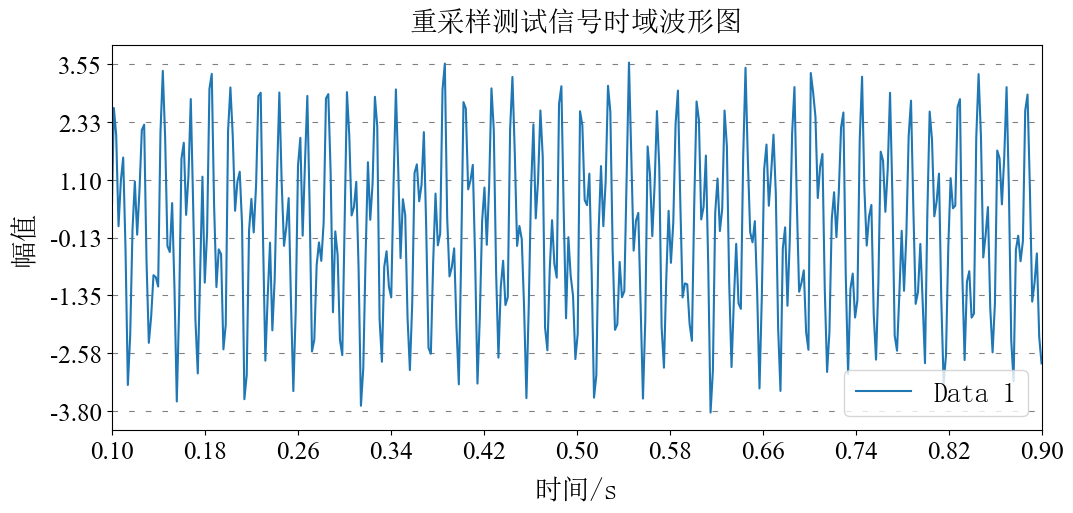

In [28]:
from PySP.Signal import Signal,Resample

try:
    Sig = Signal(data=Data,fs=fs,label='测试信号')
    Sig.plot()
    Sig=Resample(Sig=Sig,fs_resampled=500,t0=0.1,T=0.8)
    print(repr(Sig))
    Sig.plot()
except Exception as e:
    print(e)

### 1.3 Signal.Periodic()

Signal(data=[ 1.76626031  0.58964259 -0.79053568 ... -1.02641177  1.47921408
  1.77873782], fs=1000, label=仿真含噪准周期信号)


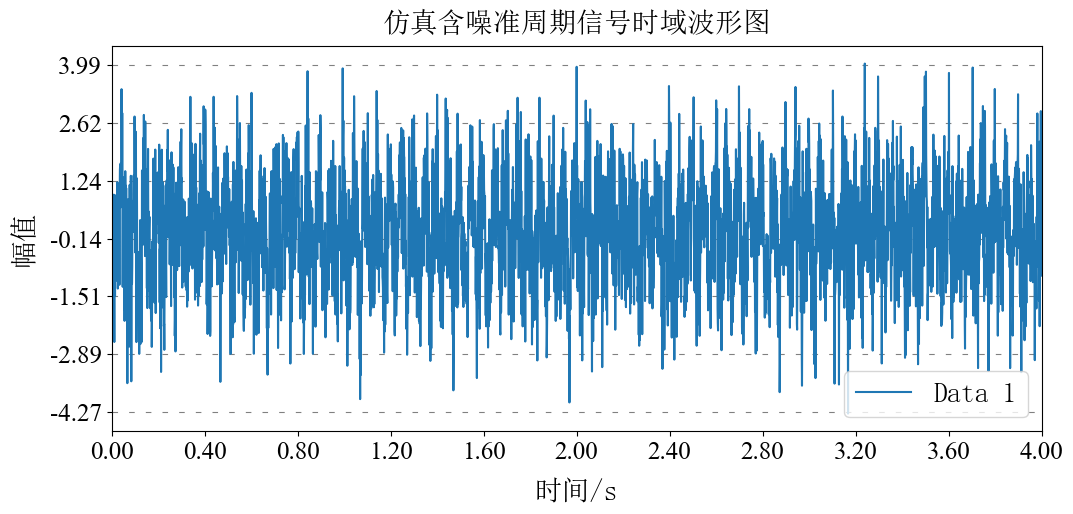

In [29]:
from PySP.Signal import Periodic

try:
    Sig = Periodic(fs=1000,T=4,CosParams=((20,1,32),(50,0.5,0)),noise=1)
    print(repr(Sig))
    Sig.plot()
except Exception as e:
    print(e)

## 2. Analysis模块测试

### 2.1 Analysis.Analysis()

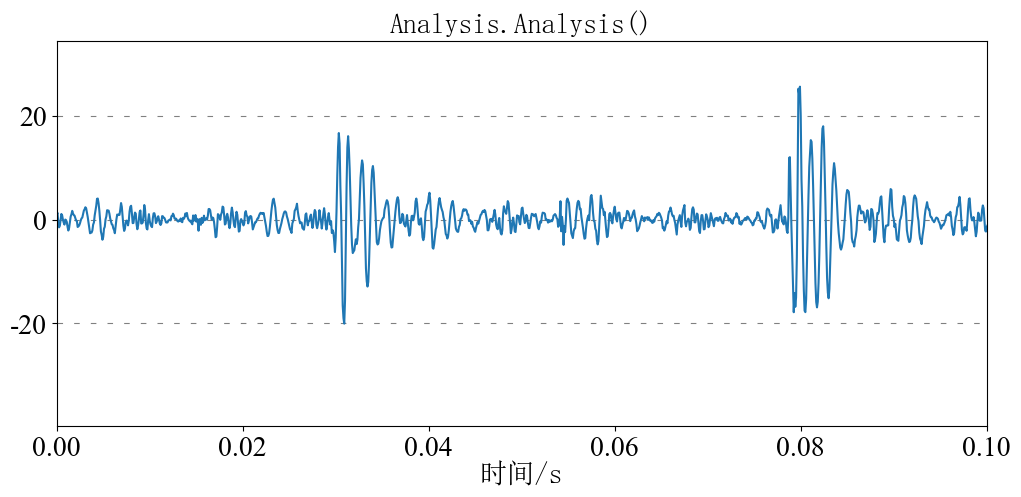

In [13]:
from PySP.Analysis import Analysis
from PySP.Signal import Signal
from PySP.Plot import LinePlotFunc
from PySP.decorators import InputCheck

try:

    class TestAnalysis(Analysis):

        @Analysis.Plot(LinePlotFunc)
        @InputCheck({"x": {"OpenLow": 0}})
        def run(self, x: float):
            t_Axis = self.Sig.t_Axis
            data = self.Sig.data * x
            return t_Axis, data

    Sig = Signal(data=Data, fs=fs)
    test = TestAnalysis(
        Sig,
        isPlot=True,
        xlabel="时间/s",
        xlim=(0, 0.1),
        title="Analysis.Analysis()",
        height=2,
    )
    test.run(2.0)

except Exception as e:
    print(e)

## 2. Plot模块测试

### 2.1 Plot.Plot()

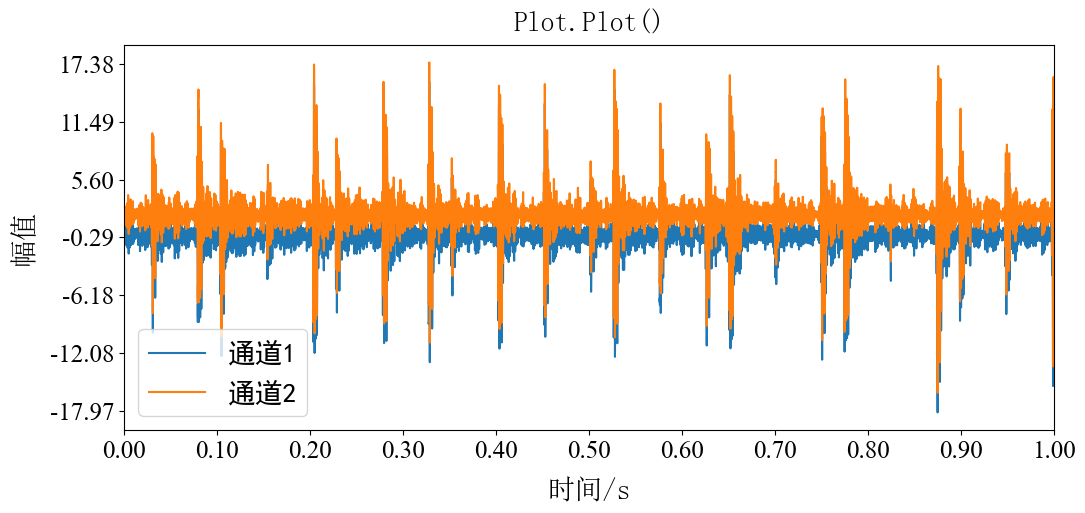

In [ ]:
from PySP.Plot import Plot
from PySP.Signal import Signal

try:
    Sig = Signal(data=Data, fs=fs, label="测试信号")

    class TestPlot(Plot):
        def _custom_setup(self, Axis, Data):
            for i, data in enumerate(Data):
                self.axes.plot(Axis, data, label=f"通道{i+1}")
            self.axes.legend()

    test=TestPlot(
        xlabel="时间/s",
        ylabel="幅值",
        title="Plot.Plot()",
    )
    test.show(Axis=Sig.t_Axis, Data=np.array([Sig, Sig + 2]))
except Exception as e:
    print(e)

### 2.2 Plot.LinePlot()

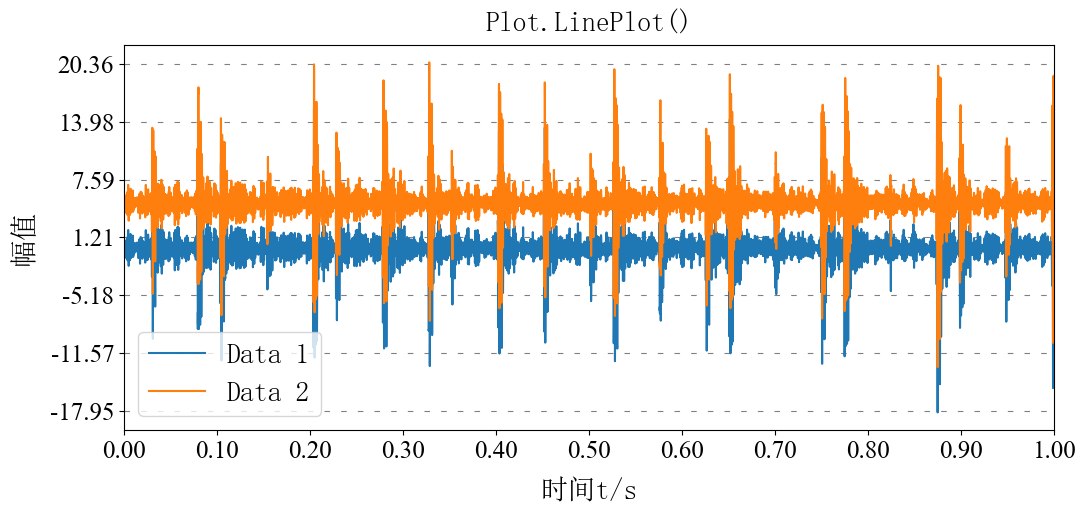

In [ ]:
from PySP.Plot import LinePlot
from PySP.Signal import Signal

try:
    Sig = Signal(data=Data, fs=fs, label="测试信号")

    LinePlot(xlabel="时间t/s", ylabel="幅值", title="Plot.LinePlot()").show(
        Axis=Sig.t_Axis, Data=np.array([Sig.data,Sig.data+5]), 
    )
except Exception as e:
    print(e)

### 2.3 Plot.imshow()

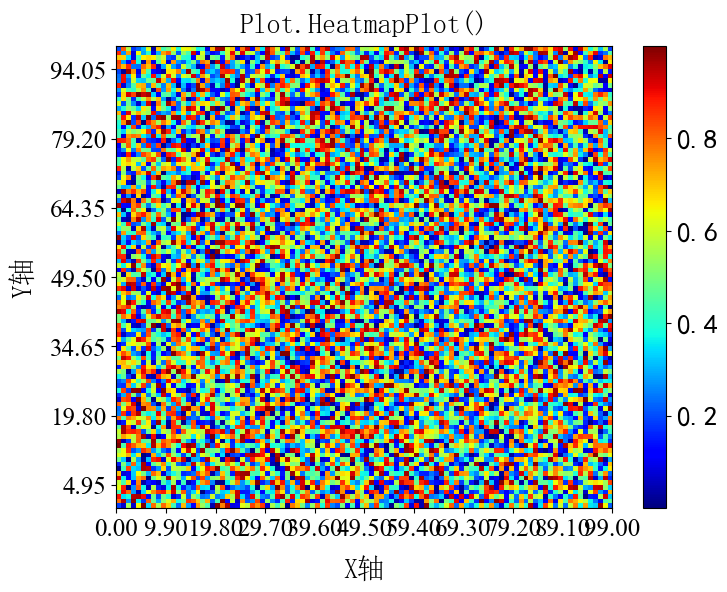

In [60]:
from PySP.Plot import HeatmapPlot
from numpy import random

try:
    Axis1 = np.arange(100)
    Axis2 = np.arange(100)
    data = random.random((100, 100))

    HeatmapPlot(
        figsize=(8, 6), xlabel="X轴", ylabel="Y轴", title="Plot.HeatmapPlot()"
    ).show(Axis1=Axis1, Axis2=Axis2, Data=data)
except Exception as e:
    print(e)

### 2.4 Plot.PeakfinderPlugin()

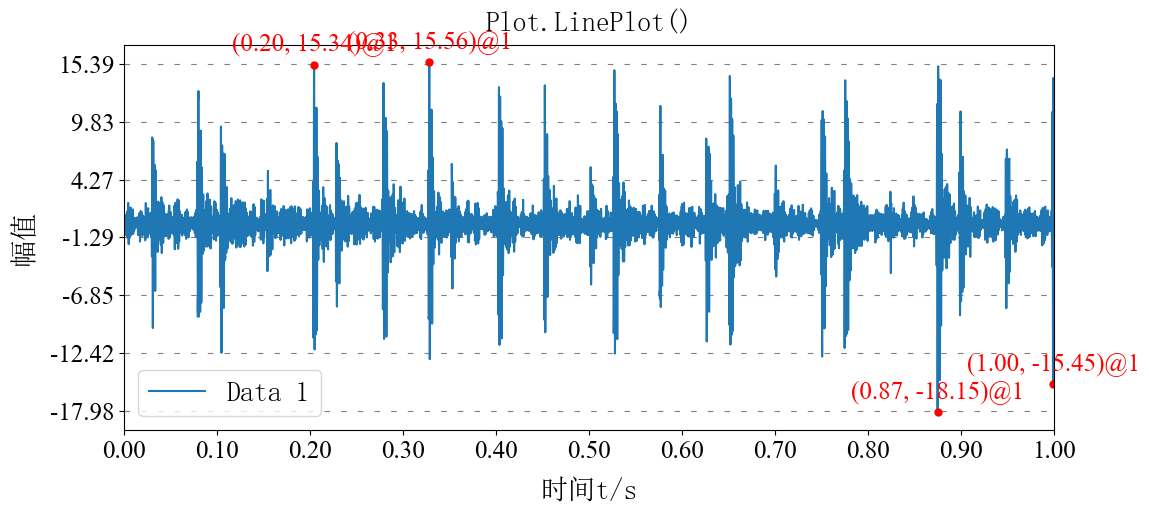

In [ ]:
from PySP.Plot import PeakfinderPlugin,LinePlot
from PySP.Signal import Signal

try:
    Sig = Signal(data=Data, fs=fs, label="测试信号")

    fig=LinePlot(xlabel="时间t/s", ylabel="幅值", title="Plot.LinePlot()")
    fig.add_plugin(
        PeakfinderPlugin(
            height=15,
            distance=100,
        )
    )
    fig.show(Axis=Sig.t_Axis, Data=Sig.data)
except Exception as e:
    print(e)

## 3.BasicSP模块测试

### 3.1 BasicSP.window()

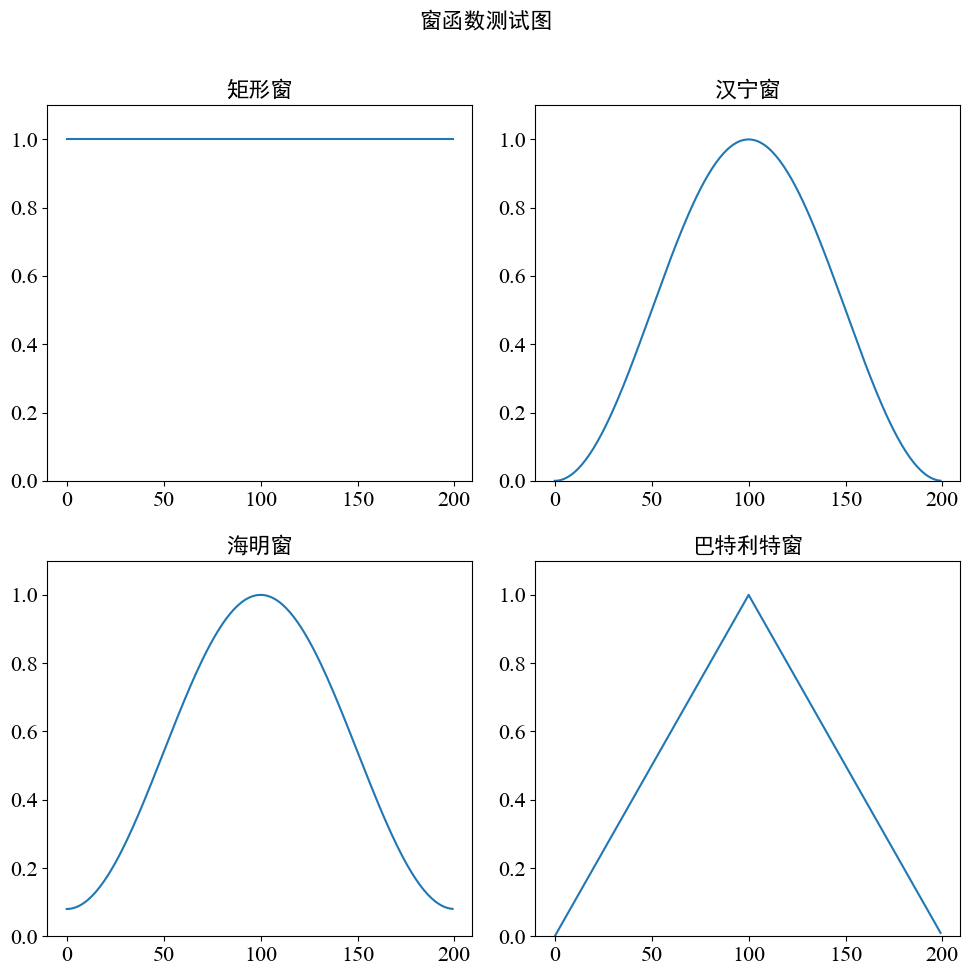

res1:  <class 'numpy.float64'>
res2:  <class 'numpy.float64'>
res3:  <class 'numpy.ndarray'>


In [ ]:
from PySP.BasicSP import window

try:
    Sig=window(type="汉宁窗",num=200,padding=50,check=True)
    for i,r in enumerate(Sig):
        print(f"res{i+1}: ",type(r))
except Exception as e:
    print(e)

### 3.2 BasicSP.Time_Analysis()

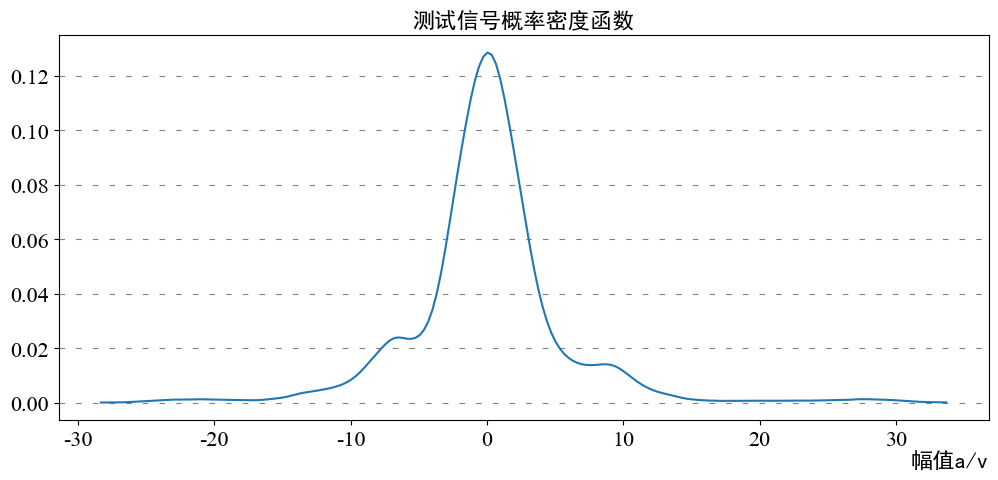

res1:  <class 'numpy.ndarray'>
res2:  <class 'numpy.ndarray'>


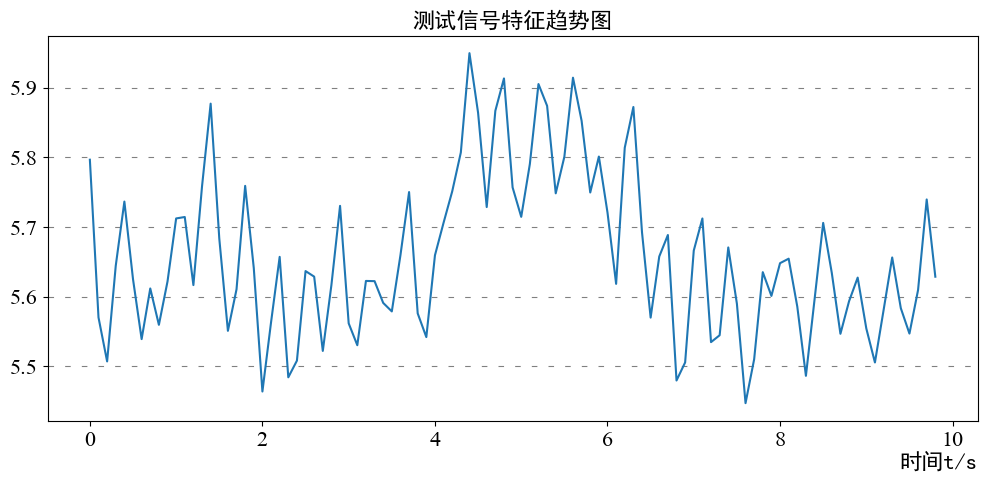

res1:  <class 'numpy.ndarray'>
res2:  <class 'numpy.ndarray'>


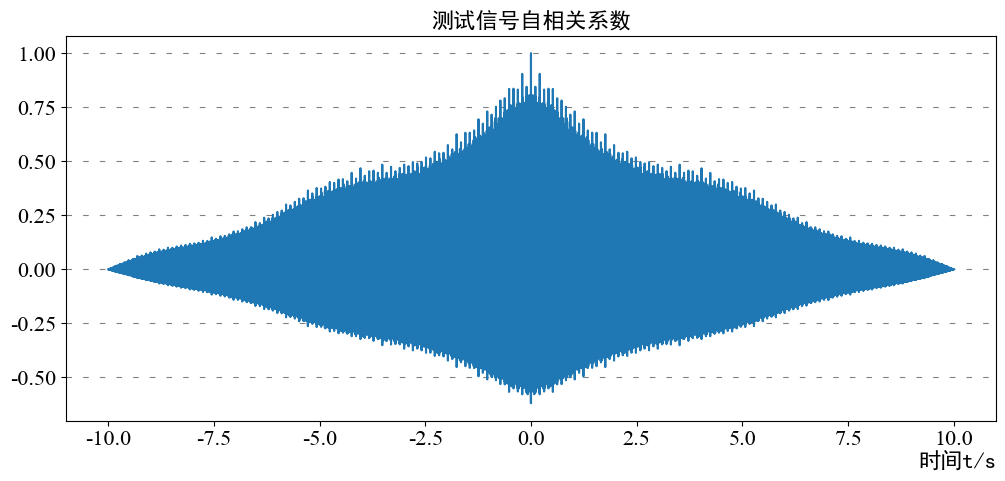

res1:  <class 'numpy.ndarray'>
res2:  <class 'numpy.ndarray'>


In [ ]:
from PySP.BasicSP import Time_Analysis

try:
    Sig=Signal(data=Data,label='测试信号',fs=12000)
    # Time_Analysis.Psd()
    Sig=Time_Analysis(Sig=Sig,plot=True,plot_save=False,title=Sig.label+"概率密度函数",xlabel="幅值a/v").Pdf(samples=200)
    for i, r in enumerate(Sig):
        print(f"res{i+1}: ", type(r))
    # Time_Analysis.Trend()
    Sig=Time_Analysis(Sig=Sig,plot=True,plot_save=False,title=Sig.label+"特征趋势图",xlabel="时间t/s").Trend(Feature="有效值",step=0.1,SegLength=0.2)
    for i,r in enumerate(Sig):
        print(f"res{i+1}: ",type(r))
    # Time_Analysis.Autocorr()
    Sig=Time_Analysis(Sig=Sig,plot=True,plot_save=False,title=Sig.label+"自相关系数",xlabel="时间t/s").Autocorr(std=True,both=True)
    for i,r in enumerate(Sig):
        print(f"res{i+1}: ",type(r))
except Exception as e:
    print(e)

### 3.3 BasicSP.Frequency_Analysis()

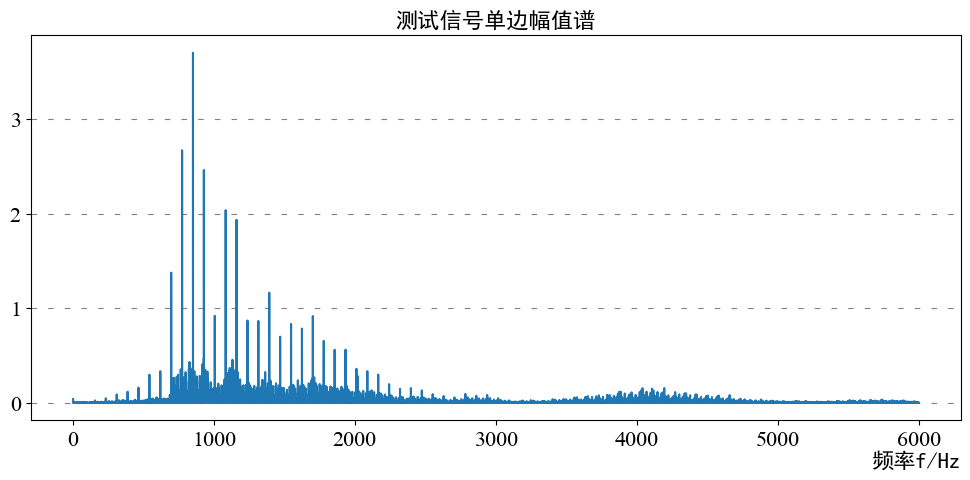

res1:  <class 'numpy.ndarray'>
res2:  <class 'numpy.ndarray'>


In [ ]:
from PySP.BasicSP import Frequency_Analysis

try:
    Sig = Signal(data=Data, label="测试信号", fs=12000)
    # Frequency_Analysis.Cft()
    Sig = Frequency_Analysis(
        Sig=Sig,
        plot=True,
        plot_save=False,
        title=Sig.label + "单边幅值谱",
        xlabel="频率f/Hz",
    ).Cft(WinType="汉宁窗")
    for i, r in enumerate(Sig):
        print(f"res{i+1}: ", type(r))
except Exception as e:
    print(e)

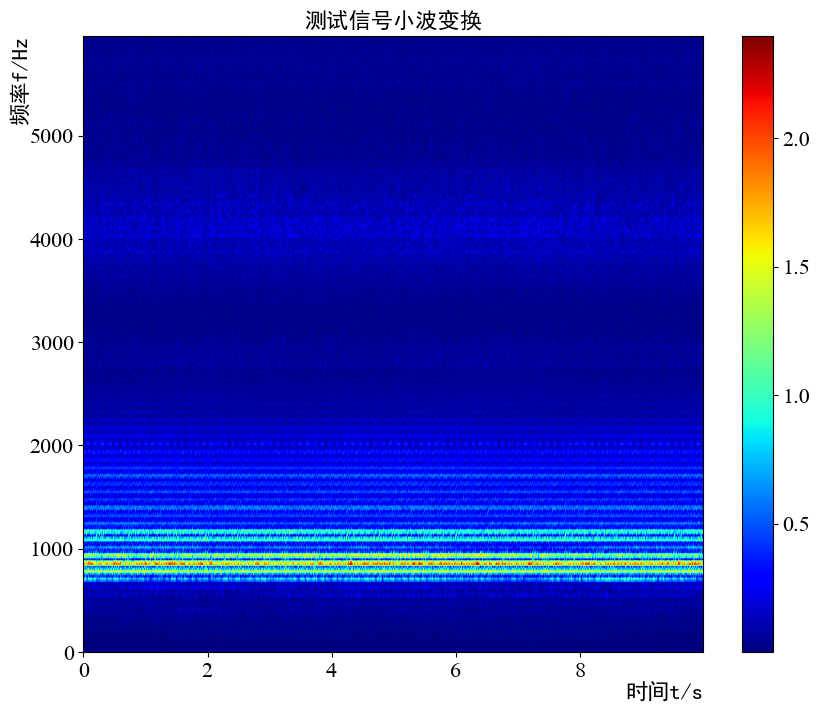

res1:  <class 'numpy.ndarray'>
res2:  <class 'numpy.ndarray'>
res3:  <class 'numpy.ndarray'>


In [ ]:
from PySP.BasicSP import TimeFre_Analysis

try:
    Sig = Signal(data=Data, label="测试信号", fs=12000)
    # TimeFre_Analysis.Wavelet()
    Sig = TimeFre_Analysis(
        Sig=Sig,
        plot=True,
        plot_save=False,
        title=Sig.label + "小波变换",
        xlabel="时间t/s",
        ylabel="频率f/Hz",
    ).st_Cft(nperseg=513, nhop=128,WinType="汉宁窗")
    for i, r in enumerate(Sig):
        print(f"res{i+1}: ", type(r))
except Exception as e:
    print(e)